# 패키지 및 데이터셋 로드

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore') 



%matplotlib inline

In [2]:
df = pd.read_csv('./dataset/ds_salaries.csv')
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


# 데이터 확인 및 관심없는 컬럼 제거

- work_year :	급여 년도

- experience_level :	연차 등에 따른 직무 숙련도: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director

- employment_type :	고용 형태: PT Part-time FT Full-time CT Contract FL Freelance

- job_title :	수행 직무

- salary :	급여

- salary_currency :	지불 통화

- salaryinusd :	급여 US달러 환전액

- employee_residence :	피고용인 거주지

- remote_ratio :	원격근무 비율

- company_location :	오피스 위치

- company_size :	회사 규모: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)

In [3]:
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

## 'Unnamed: 0' 컬럼 제거

In [4]:
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [5]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


## 관심없는 컬럼 제거
- 'salary'는 usd 통화로 통계를 내는 것이 표본 간 비교가 용이할 것이므로 제거.
- 'salary_currency'는 salary 컬럼 제거에 따라 필요 없어지므로 제거.
- 'employee_residence'는 'company_location'과 같은 value일 가능성이 높으며 거주지보다는 회사의 위치와 규모가 더 유용한 정보일 것이라 판단하여 제거.
- 'remote_ratio'는 median부터 이미 100이고, 다수의 표본이 원격근무의 비율이 높다고 판단됨. 코로나로 인한 부득이한 원격근무도 늘어났을 것을 감안하면 원격근무에 따른 임금 차이는 미미할 것으로 생각되어 제거.

In [6]:
df.drop(['salary', 'salary_currency', 'employee_residence', 'remote_ratio'], axis = 1, inplace = True)
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,L


# EDA

## work_year

In [7]:
df['work_year'].value_counts() / len(df)

2022    0.523888
2021    0.357496
2020    0.118616
Name: work_year, dtype: float64

In [8]:
w2020 = df.loc[(df['work_year'] == 2020)]
w2021 = df.loc[(df['work_year'] == 2021)]
w2022 = df.loc[(df['work_year'] == 2022)]
hist_data = [w2020['salary_in_usd'],w2021['salary_in_usd'],w2022['salary_in_usd']]
group_labels = ['2020 salary','2021 salary','2022 salary']
colors = ['white','red','blue']

year_salary = pd.DataFrame(columns=['2020','2021','2022'])
year_salary['2020'] = w2020.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
year_salary['2021'] = w2021.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
year_salary['2022'] = w2022.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values

fig1 = ff.create_distplot(hist_data, group_labels, show_hist=False,colors=colors)
fig2 = go.Figure(data=px.bar(x= year_salary.columns, 
                            y=year_salary.values.tolist()[0],
                            color = year_salary.columns,
                            color_discrete_sequence= colors,
                            title='Mean Salary by Work Year',
                            text = np.round([num/1000 for num in year_salary.values.tolist()[0]],2),
#                             width = [year_salary.values.tolist()[0]],
                            template = 'plotly_dark',
                            height=500))
fig1.layout.template = 'plotly_dark'
fig1.update_layout(title='Salary Distribution by Work Year', font = dict(size=17,family="Franklin Gothic"))
fig2.update_traces(width=0.3)
fig2.update_layout(
    xaxis_title="Work Year",
    yaxis_title="Mean Salary (k)",
    font = dict(size=17,family="Franklin Gothic"))
fig1.show()
fig2.show()

2022년도 급여 자료가 절반 이상. 만약 인플레이션이나 노동시장의 수요 급증으로 인해 급여가 매년 상승하였다면 2020년이나 2021년의 급여에 가중을 주고 'work_year' 컬럼을 없애면서 차원을 줄이는 방안도 고려할 만함.

## job_title

In [9]:
print(df['job_title'].value_counts().size)
print(df['job_title'].value_counts())

50
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                         

In [10]:
df[df['experience_level'] == 'EN'].groupby(['work_year', 'experience_level','job_title'])["salary_in_usd"].mean()

work_year  experience_level  job_title                         
2020       EN                AI Scientist                           45896.000000
                             Big Data Engineer                      70000.000000
                             Business Data Analyst                 100000.000000
                             Data Analyst                           44768.000000
                             Data Engineer                          48215.500000
                             Data Science Consultant                 5707.000000
                             Data Scientist                         54983.333333
                             ML Engineer                            15966.000000
                             Machine Learning Engineer             194000.000000
                             Research Scientist                     42000.000000
2021       EN                AI Scientist                           14017.666667
                             Applied Data Sci

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Data Scientist'),
  Text(1, 0, 'Data Engineer'),
  Text(2, 0, 'Data Analyst'),
  Text(3, 0, 'Machine Learning Engineer'),
  Text(4, 0, 'Research Scientist'),
  Text(5, 0, 'Data Science Manager'),
  Text(6, 0, 'Data Architect'),
  Text(7, 0, 'Big Data Engineer'),
  Text(8, 0, 'Machine Learning Scientist'),
  Text(9, 0, 'Principal Data Scientist')])

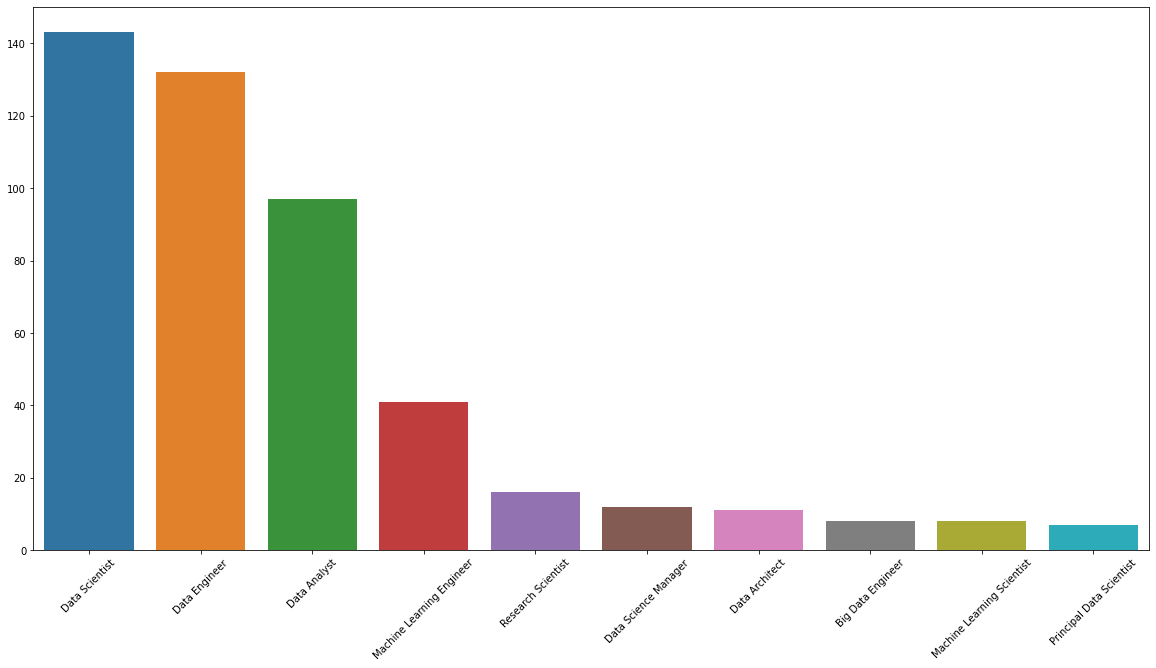

In [11]:
top10_job_title = df['job_title'].value_counts()[:10]

plt.figure(figsize=(20,10))
sns.barplot(y=top10_job_title.values, 
             x=top10_job_title.index)
plt.xticks(rotation = 45)

데이터 사이언티스트, 데이터 엔지니어, 데이터 분석가 순으로 많고 유사 직렬이 꽤 많다.  
유사 직무가 세분화되어 있어 직무 간 차등을 통해 임금 상승률을 파악하는 것은 어려워 보임

In [12]:
salary_job = df.groupby(['salary_in_usd','job_title']).size().reset_index()
salary_job = salary_job[-20:]
fig = px.bar(x=salary_job['job_title'],y=salary_job['salary_in_usd'],text = salary_job['salary_in_usd'], 
                   color = salary_job['salary_in_usd'], color_discrete_sequence=px.colors.sequential.PuBu)
fig.update_layout(
    xaxis_title="Job Title",
    yaxis_title="Salaries ")
# fig.update_traces(width=0.9)
fig.update_layout(barmode = 'relative',xaxis_tickangle=-45, 
                  title='Top 20 Highest Salary by Job Title', template='plotly_dark',font = dict(size=17,family="Franklin Gothic"))

## experience_level

In [13]:
df['experience_level'].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [14]:
df[df['experience_level'] == 'EN'].groupby(['work_year', 'experience_level'])["salary_in_usd"].mean()

work_year  experience_level
2020       EN                  63648.600000
2021       EN                  59101.021277
2022       EN                  65423.428571
Name: salary_in_usd, dtype: float64

In [15]:
df[df['experience_level'] == 'MI'].groupby(['work_year', 'experience_level'])["salary_in_usd"].mean()

work_year  experience_level
2020       MI                  85950.062500
2021       MI                  85490.088889
2022       MI                  91193.956044
Name: salary_in_usd, dtype: float64

In [16]:
df[df['experience_level'] == 'SE'].groupby(['work_year', 'experience_level'])["salary_in_usd"].mean()

work_year  experience_level
2020       SE                  137240.500000
2021       SE                  126596.188406
2022       SE                  143043.398964
Name: salary_in_usd, dtype: float64

In [17]:
df[df['experience_level'] == 'EX'].groupby(['work_year', 'experience_level'])["salary_in_usd"].mean()

work_year  experience_level
2020       EX                  202416.500000
2021       EX                  223752.727273
2022       EX                  178313.846154
Name: salary_in_usd, dtype: float64

Entrylevel, Middlelevel, SeniorLevel의 경우 2021년에는 급여가 줄었으나 2022년에는 다시 늘어남.  

Expertlevel의 경우는 반대로 2021년에 고점.  
근거를 파악할 수 없으며, 위에서 너무나도 세분화된 직무마다의 차이를 고려할 수는 없음.  
직무숙련도, 직무별로 년도마다의 임금상승률을 반영하는 것은 어렵다는 결론.  
년도별로 회사 규모, 위치에 따른 급여를 비교하는 것이 합당하다고 여겨짐.

<AxesSubplot:xlabel='company_size', ylabel='count'>

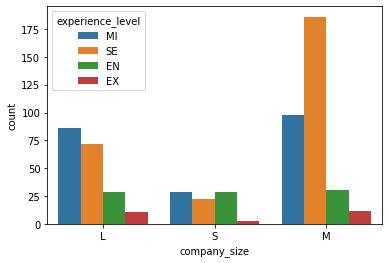

In [18]:
sns.countplot(data = df, x = 'company_size', orient = 'h', hue = 'experience_level')

데이터 상에서는 중간 규모의 회사에서 근무하는 시니어 레벨 표본의 수가 가장 많다.

<AxesSubplot:xlabel='salary_in_usd', ylabel='experience_level'>

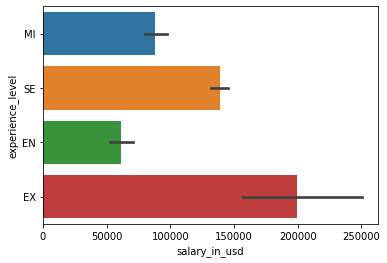

In [19]:
sns.barplot(data = df, y= 'experience_level', x = 'salary_in_usd', orient = 'h')

Level과 급여의 상관관계는 높은 것으로 보인다. EX level 을 제외하면 양극단의 차이도 적은 편

## employment_type

In [20]:
df['employment_type'].value_counts() / len(df)

FT    0.968699
PT    0.016474
CT    0.008237
FL    0.006590
Name: employment_type, dtype: float64

대부분의 표본이 풀타임 정규직. 소수지만 파트타임, 계약직, 프리랜서 순서로 비율이 적어진다.  
PT, CT, FL의 급여와 FT의 급여의 차이가 크다면 차라리 PT, CT, FL 를 제거하고 고용형태 컬럼을 제거한다.

In [21]:
df.groupby(['employment_type', 'experience_level'])["salary_in_usd"].mean()

employment_type  experience_level
CT               EN                   65937.500000
                 EX                  416000.000000
                 MI                  270000.000000
                 SE                  105000.000000
FL               MI                   44000.000000
                 SE                   60000.000000
FT               EN                   64457.455696
                 EX                  190727.720000
                 MI                   88403.169903
                 SE                  139021.014388
PT               EN                   28656.857143
                 MI                   43369.000000
Name: salary_in_usd, dtype: float64

파트타임 근로자의 경우 평균급여가 두배가량 낮고, 계약직 근로자의 경우 평균적으로 Midlevel과 Expertlevel에서 풀타임보다 두배 이상의 급여를 받는다.  
프리랜서도 평균급여가 풀타임 근로자와 차이가 크다.

In [22]:
not_fulltime = df[df['employment_type'] != 'FT'].index
df.drop(not_fulltime, inplace = True)

In [23]:
df['employment_type'].value_counts() / len(df)

FT    1.0
Name: employment_type, dtype: float64

## company_location

In [24]:
df['company_location'].value_counts()

US    346
GB     47
CA     30
DE     26
IN     23
FR     15
ES     13
GR     11
JP      6
PL      4
AT      4
PT      4
AE      3
NL      3
MX      3
BR      3
AU      3
TR      3
LU      3
CH      2
RU      2
BE      2
SI      2
NG      2
DK      2
CN      2
PK      2
IT      1
CZ      1
MD      1
AS      1
VN      1
EE      1
MY      1
KE      1
SG      1
CO      1
IR      1
CL      1
MT      1
IL      1
UA      1
IQ      1
RO      1
HR      1
NZ      1
HU      1
HN      1
IE      1
Name: company_location, dtype: int64

(-0.5, 10.5)

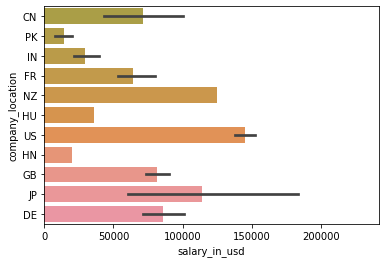

In [25]:
sns.barplot(data = df, y= 'company_location', x = 'salary_in_usd', orient = 'h')
plt.ylim([-0.5, 10.5])

국가별 평균을 비교하고 싶지만 barplot은 평균을 보여주며, 미국을 제외하면 표본수가 적다.

## compay_size

In [26]:
df['company_size'].value_counts()

M    318
L    193
S     77
Name: company_size, dtype: int64

<AxesSubplot:xlabel='salary_in_usd', ylabel='company_size'>

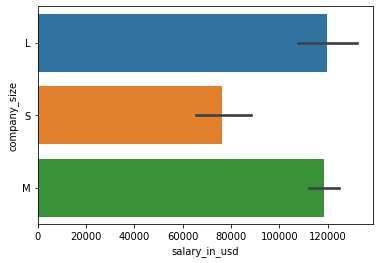

In [27]:
sns.barplot(data = df, y= 'company_size', x = 'salary_in_usd', orient = 'h')

작은 규모의 회사를 제외하면 평균 급여 차이는 미미하다. 하지만 큰 규모의 회사의 고점이 더 높다.

<AxesSubplot:xlabel='salary_in_usd', ylabel='company_size'>

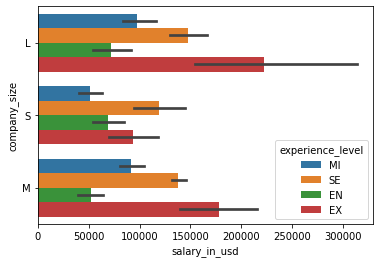

In [28]:
sns.barplot(data = df, y= 'company_size', x = 'salary_in_usd', orient = 'h', hue = 'experience_level')

회사 규모에 따른 직급별 임금차를 시각화하면 이전의 그래프에서보다 M 사이즈 L사이즈 회사 간의 차이가 눈에 보이는 편.  
EX 레벨에서 차이가 꽤 벌어지며, 큰 규모의 회사에서도 EX 레벨 간 차이가 꽤 난다.